In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn 

In [6]:
# Creating data
np.random.seed(0)
n=20   # data points
x=np.linspace(0, 10, n)
y=x*2 + 1 + 1*np.random.randn(n) # standard deviation = 1

In [7]:
print(x)
print(y)

[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]
[ 2.76405235  2.45278879  4.08400114  6.39878794  7.07808431  5.28588001
  8.26587789  8.21706384  9.31783378 10.88428271 11.67035936 14.03322088
 14.39261667 14.80588554 16.18070534 17.12314801 19.33618434 18.68957858
 20.26043612 20.14590426]


In [8]:
# Importing LinearRegression class
from sklearn.linear_model import LinearRegression

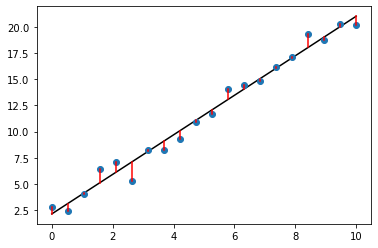

In [9]:
# Fitting line through the data points x, y
model = LinearRegression(fit_intercept=True)
model.fit(x[:,np.newaxis], y)
xfit = np.linspace(0,10,100)
yfit = model.predict(xfit[:, np.newaxis])
plt.plot(xfit, yfit, color="black")
plt.plot(x, y, "o")

# This will draw as many line segments as there are columns in matrices x and y
plt.plot(np.vstack([x,x]), np.vstack([y, model.predict(x[:, np.newaxis])]), color="red")
plt.show()

In [10]:
print("Parameters:", model.coef_, model.intercept_)
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)

"""Note that in scikit-learn the attributes of the model that store the learned 
parameters have always an underscore at the end of the name. This applies to all
algorithms in sklearn, not only the linear regression. This naming style allows 
one to easily spot the learned model parameters from other attributes."""

Parameters: [1.88627741] 2.1379475205341283
Coefficient: 1.8862774144823018
Intercept: 2.1379475205341283


'Note that in scikit-learn the attributes of the model that store the learned \nparameters have always an underscore at the end of the name. This applies to all\nalgorithms in sklearn, not only the linear regression. This naming style allows \none to easily spot the learned model parameters from other attributes.'

In [11]:
# Regression with multiple explanatory variables

# The three explanatory variables have values 1, 2, and 3, respectively
sample1=np.array([1,2,3]) 

# More examples of values of explanatory variables
sample2=np.array([4,5,6]) 
sample3=np.array([7,8,10])
                 
# For values 1,2, and 3 of explanatory variables, the value y=15 was observed, and so on.
y=np.array([15,39,66]) + np.random.randn(3)       

In [12]:
# Fitting a linear model to these points

model2=LinearRegression(fit_intercept=False)
x=np.vstack([sample1,sample2,sample3])
model2.fit(x, y)
model2.coef_, model2.intercept_

(array([5.69493795e+00, 3.36972233e+00, 4.20919214e-03]), 0.0)

In [13]:
b=model2.coef_[:, np.newaxis]
print("x:\n", x)
print("b:\n", b)
print("y:\n", y[:, np.newaxis])
print("product:\n", np.matmul(x, b))

x:
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8 10]]
b:
 [[5.69493795e+00]
 [3.36972233e+00]
 [4.20919214e-03]]
y:
 [[12.44701018]
 [39.6536186 ]
 [66.8644362 ]]
product:
 [[12.44701018]
 [39.6536186 ]
 [66.8644362 ]]


Coefficients: [-36.65414588 -20.17228669   0.15359003]
Intercept: -167.16046606447708


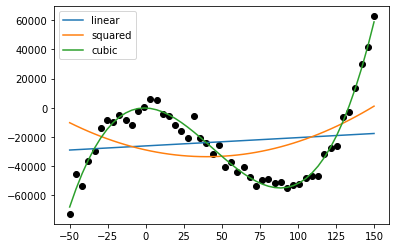

In [14]:
# Polynomial regression with explanatory variables, x, x**2 and x**3

x=np.linspace(-50,150,50)
y=0.15*x**3 - 20*x**2 + 5*x - 4 + 5000*np.random.randn(50)
plt.scatter(x, y, color="black")

model_linear=LinearRegression(fit_intercept=True)
model_squared=LinearRegression(fit_intercept=True)
model_cubic=LinearRegression(fit_intercept=True)

x2=x**2
x3=x**3

model_linear.fit(np.vstack([x]).T, y)
model_squared.fit(np.vstack([x,x2]).T, y)
model_cubic.fit(np.vstack([x,x2,x3]).T, y)
xf=np.linspace(-50,150, 50)

yf_linear=model_linear.predict(np.vstack([x]).T)
yf_squared=model_squared.predict(np.vstack([x,x2]).T)
yf_cubic=model_cubic.predict(np.vstack([x,x2,x3]).T)

plt.plot(xf,yf_linear, label="linear")
plt.plot(xf,yf_squared, label="squared")
plt.plot(xf,yf_cubic, label="cubic")
plt.legend()

print("Coefficients:", model_cubic.coef_)
print("Intercept:", model_cubic.intercept_)

In [15]:
# Polynomial basis functions

# Transformer converts one-dimensional array into a three-dimensional array
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [16]:
# 7th-degree polynomial model with pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

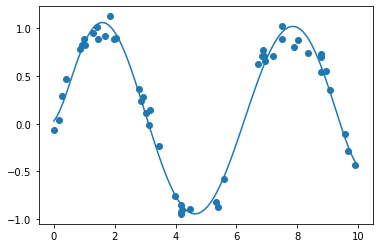

In [17]:
# Using above transform to have sine wave with noise
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);